In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

MSE: 134.4338762
R²:  0.2852683


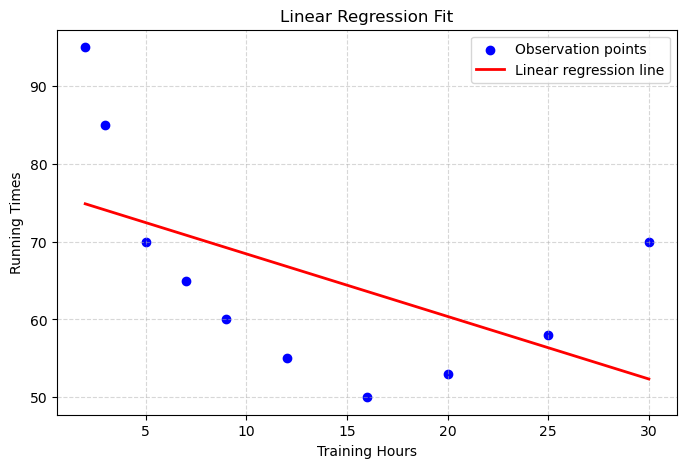

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Our data
training_hours = np.array([2, 3, 5, 7, 9, 12, 16, 20, 25, 30]).reshape(-1, 1)
running_times = np.array([95, 85, 70, 65, 60, 55, 50, 53, 58, 70])

# create linear regression
# no train-test
# mse? r2? 
# *bonus: draw the observation points on a graph, scatter

model = LinearRegression()
model.fit(training_hours, running_times)

y_pred = model.predict(training_hours)

mse = mean_squared_error(running_times, y_pred)
r2 = r2_score(running_times, y_pred)

print(f"MSE: {mse:.7f}")
print(f"R²:  {r2:.7f}")

plt.figure(figsize=(8, 5))
plt.scatter(training_hours, running_times, color='blue', label='Observation points')
plt.plot(training_hours, y_pred, color='red', linewidth=2, label='Linear regression line')
plt.xlabel('Training Hours')
plt.ylabel('Running Times')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

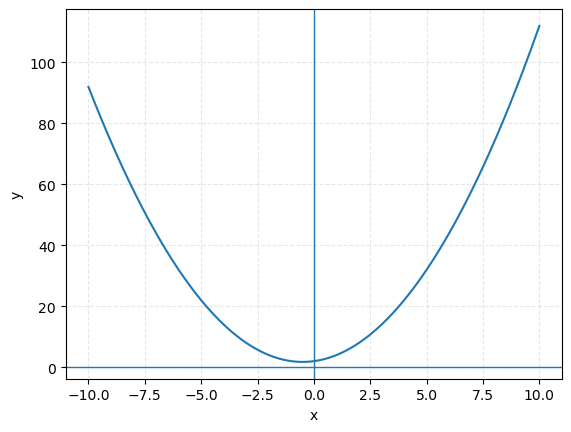

In [18]:
# 3) Plot a quadratic: y = a x^2 + b x + c
import numpy as np
import matplotlib.pyplot as plt

# Coefficients
a, b, c = 1.0, -3.0, 2.0

x = np.linspace(-10, 10, 400)
# y = a*x + b

# a = -10 to +10 step 0.1
# b = -10 to +10 step 0.1
# c = -10 to +10 step 0.1
y = a * x**2 + x + c

plt.figure()
plt.plot(x, y)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)
plt.xlabel('x')
plt.ylabel('y')
#plt.title(f'y = {a}x² + {b}x + {c}')
plt.grid(True, which='both', linestyle='--', alpha=0.3)
plt.show()


Intercept (β₀) c: 100.05
Coefficient for x (β₁)  b: -5.71
Coefficient for x² (β₂) a: 0.16
y = 0.16x² + -5.71x + 100.05
r2 0.9509672159774887
adj_r 0.936957849113914
predict 17 ==  [49.00909176]


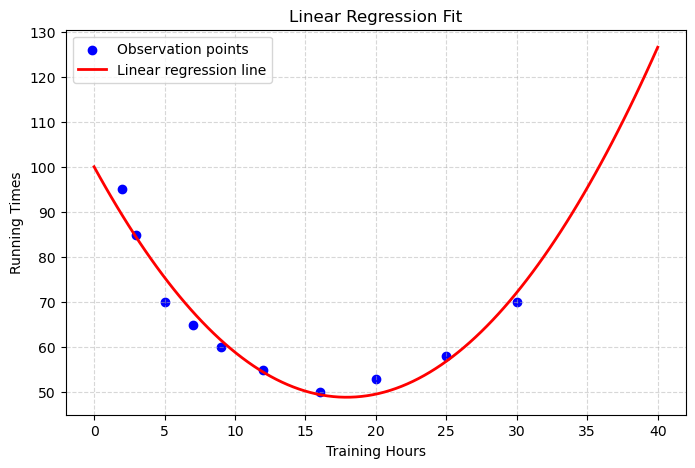

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Our data
training_hours = np.array([2, 3, 5, 7, 9, 12, 16, 20, 25, 30]).reshape(-1, 1)
running_times = np.array([95, 85, 70, 65, 60, 55, 50, 53, 58, 70])

# y = a*x**2  + b*x + c
# 1    x    x**2
# b0   b1   b2

# y = a * x**2 + b * x + c

poly = PolynomialFeatures(degree=2, include_bias=True)  # prepare
X_poly_3_column = poly.fit_transform(training_hours)  # do

model = LinearRegression()
model.fit(X_poly_3_column, running_times)

intercept = model.intercept_
coefficients = model.coef_

print(f"Intercept (β₀) c: {intercept:.2f}")
print(f"Coefficient for x (β₁)  b: {coefficients[1]:.2f}")
print(f"Coefficient for x² (β₂) a: {coefficients[2]:.2f}")
a = coefficients[2]
b = coefficients[1]
c = intercept
print(f"y = {a:.2f}x² + {b:.2f}x + {c:.2f}")

# get r2 + adjr2
r2 = r2_score(running_times, model.predict(X_poly_3_column))
print('r2', r2)

def get_adj_r2(train_r2, X_train):
    # i.e. X_train.shape == (8, 4) -> 8 rows 4 features
    n = X_train.shape[0]
    p = X_train.shape[1] - 1  # because 1 column is not really a feature column
    result = 1 - ((1 - train_r2) * (n - 1)) / (n - p - 1)
    return result

adj_r = get_adj_r2(r2, X_poly_3_column)
print('adj_r', adj_r)

# predict 17
print('predict 17 == ', model.predict(np.array(poly.fit_transform(np.array([17]).reshape(-1, 1)))))

# draw parabola
plt.figure(figsize=(8, 5))
plt.scatter(training_hours, running_times, color='blue', label='Observation points')  # Observation points

x = np.linspace(0, 40, 100)
y_graph = a * x ** 2 + b * x + c
plt.plot(x, y_graph, color='red', linewidth=2, label='Linear regression line')

plt.xlabel('Training Hours')
plt.ylabel('Running Times')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
